In [26]:
 import os
 import numpy as np
 from sklearn.model_selection import train_test_split
 from google.colab import drive
 from tensorflow.keras.preprocessing.image import img_to_array, load_img
 from tensorflow.keras.utils import to_categorical
 from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
 from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
 from tensorflow.keras.models import Sequential
 from tensorflow.keras import regularizers
 import matplotlib.pyplot as plt

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data_dir = '/content/drive/My Drive/data'
img_size=128
categories= ['no_tumor','tumor']
data = []

In [29]:
for category in categories :
  path = os.path.join(data_dir,category)
  label = categories.index(category)

  for img_name in os.listdir(path):
    try :
      img_path = os.path.join(path,img_name)
      img = load_img(img_path, target_size=(img_size,img_size))
      img_array = img_to_array(img)/255.0
      data.append((img_array,label))
    except Exception as e :
      print('error', e)

print(len(data))



253


In [30]:
images, labels = zip(*data)
images = np.array(images)
labels = to_categorical(labels)

In [31]:
x_train, x_test, y_train, y_test = train_test_split (images, labels, test_size=0.2, random_state=42)

In [32]:
model = Sequential ([
    Conv2D(16, (3,3), input_shape=(img_size,img_size,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.6),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop], validation_split=0.2)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.5886 - loss: 0.9177 - val_accuracy: 0.6585 - val_loss: 0.5897
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 491ms/step - accuracy: 0.6576 - loss: 0.8837 - val_accuracy: 0.8293 - val_loss: 0.6560
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.6527 - loss: 0.6881 - val_accuracy: 0.8537 - val_loss: 0.6157
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.7224 - loss: 0.6660 - val_accuracy: 0.8537 - val_loss: 0.5651
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7503 - loss: 0.6159 - val_accuracy: 0.8537 - val_loss: 0.5017
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.7318 - loss: 0.6757 - val_accuracy: 0.8537 - val_loss: 0.4987
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.7800 - loss: 0.5967 - val_accuracy: 0.8780 - val_loss: 0.4780
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.7485 - loss: 0.5615 - val_accuracy: 0.8293 - val_loss:

In [35]:
accuracy, loss = model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8799 - loss: 0.5281


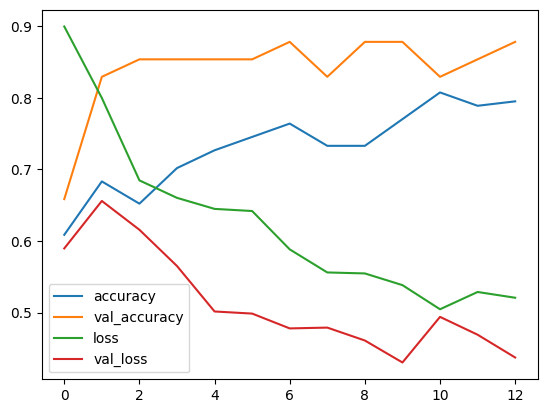

In [36]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']
plt.plot(acc, label='accuracy' )
plt.plot(val_accuracy, label='val_accuracy')
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()